In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sb 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from scipy import stats

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [102]:
datos = pd.read_csv('datos/meteo.csv')#leer dataset
datos

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


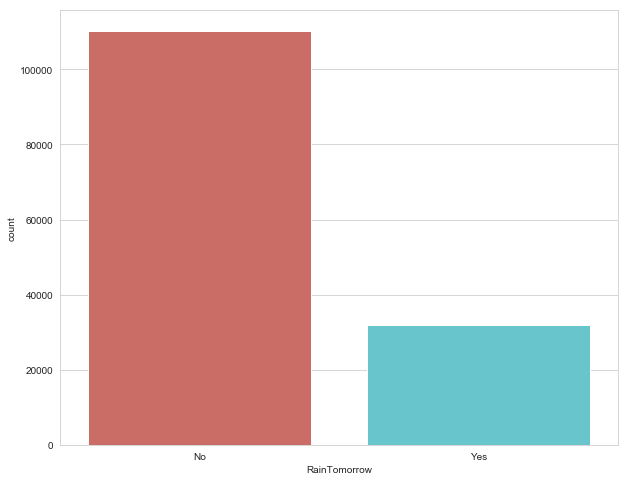

In [103]:
sb.countplot(x='RainTomorrow',data=datos, palette='hls')# grafico del set de datos para ver la cantidad dias que llueve o no

In [104]:
datos.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [105]:
datos = datos.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], 1)
#al ser muchos datos con valor NaN, cada uno cercano al 1/3 en su categoria, considero necesario eiminarlos

In [106]:
datos.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [107]:
datos = datos.drop(['Date','Location'], 1)
#Que llueva, solo depende de las conidciones en que se encuentra el clima, no depende mucho del lugar o la fecha, si no de
#los factores climaticos que estan ocurriendo, por eso se eliminan esa variable

In [108]:
datos.isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [109]:
print(datos.mean())#AVG de las columnas

MinTemp            12.186400
MaxTemp            23.226784
Rainfall            2.349974
WindGustSpeed      39.984292
WindSpeed9am       14.001988
WindSpeed3pm       18.637576
Humidity9am        68.843810
Humidity3pm        51.482606
Pressure9am      1017.653758
Pressure3pm      1015.258204
Temp9am            16.987509
Temp3pm            21.687235
RISK_MM             2.360682
dtype: float64


In [110]:
datos['MinTemp'].fillna(12.186400,inplace=True)
datos['MaxTemp'].fillna(23.226784,inplace=True)
datos['Rainfall'].fillna(2.349974,inplace=True)
datos['WindGustSpeed'].fillna(39.984292,inplace=True)
datos['WindSpeed9am'].fillna(14.001988,inplace=True)
datos['WindSpeed3pm'].fillna(18.637576,inplace=True)
datos['Humidity9am'].fillna(68.843810,inplace=True)
datos['Humidity3pm'].fillna(51.482606,inplace=True)
datos['Pressure9am'].fillna(1017.653758,inplace=True)
datos['Pressure3pm'].fillna(1015.258204,inplace=True)
datos['Temp9am'].fillna(16.987509,inplace=True)
datos['Temp3pm'].fillna(12.186400,inplace=True)
#reemplazo de NaN por los AVG correspiendtes a cada columna

In [111]:
datos.isnull().sum()

MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [112]:
datos = datos.drop(['WindGustDir','WindDir9am','WindDir3pm'], 1)

In [113]:
datos.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday        1406
RISK_MM             0
RainTomorrow        0
dtype: int64

In [114]:
datos #verificar la cantidad de filas del dataset

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.600000,44.0,20.000000,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,7.4,25.1,0.000000,44.0,4.000000,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,12.9,25.7,0.000000,46.0,19.000000,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,9.2,28.0,0.000000,24.0,11.000000,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,17.5,32.3,1.000000,41.0,7.000000,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No
5,14.6,29.7,0.200000,56.0,19.000000,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,0.0,No
6,14.3,25.0,0.000000,50.0,20.000000,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,0.0,No
7,7.7,26.7,0.000000,35.0,6.000000,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,0.0,No
8,9.7,31.9,0.000000,80.0,7.000000,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,No,1.4,Yes
9,13.1,30.1,1.400000,28.0,15.000000,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,Yes,0.0,No


In [115]:
datos.dropna(inplace=True)

In [116]:
datos.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [117]:
datos # verificar la cantidad de filas del dataset

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,0.0,No
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,0.0,No
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,0.0,No
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,No,1.4,Yes
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,Yes,0.0,No


In [122]:
X = datos.ix[:,(0,1,2,3,4,5,6,7,8,9,10,11,12,13)].values
for i in range(0,140787):
    if X[i][12] == 'Yes':
        X[i][12] = 1
    else:
        X[i][12] = 0
y = datos.ix[:,14].values
for i in range(0,140787):
    if y[i] == 'Yes':
        y[i] = 1
    else:
        y[i] = 0

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
print(X_test)

[[21.9 23.4 0.2 ... 23.0 0 13.0]
 [2.7 18.8 0.0 ... 18.1 0 0.0]
 [10.1 18.2 0.0 ... 17.3 0 0.0]
 ...
 [12.0 25.7 0.0 ... 21.1 0 5.4]
 [17.7 24.1 0.0 ... 23.2 0 0.0]
 [6.8 18.7 0.0 ... 17.8 0 0.0]]


In [120]:
#Aprendizaje
LogReg = LogisticRegression() #Regresion Logistica
LogReg.fit(X_train, y_train)

ValueError: Unknown label type: 'unknown'